In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [32]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
import churn.data as dt

# Load data

In [5]:
df = dt.get_churn_data()

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Type of contract

In [7]:
df['Contract'].drop_duplicates()

0     Month-to-month
1           One year
11          Two year
Name: Contract, dtype: object

## Number of months the customer has stayed with the company

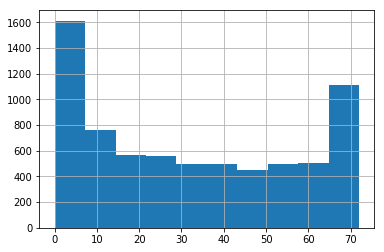

In [8]:
df['tenure'].hist()

This data is a case of right censored data. For customer who didn't churn we don't know yet their "customer lifetime".

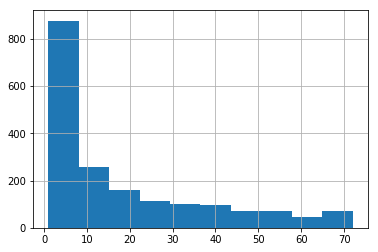

In [9]:
df['tenure'][df['Churn'] == 'Yes'].hist()

In [22]:
censored = df['tenure'][df['Churn'] == 'Yes'].values

In [23]:
uncensored = df['tenure'][df['Churn'] == 'No'].values

In [24]:
def log_likelihood_lomax(args):
    shape, scale = args
    val = stats.lomax.logpdf(uncensored, shape, loc=0, scale=scale).sum() + stats.lomax.logsf(censored, shape, loc=0, scale=scale).sum()
    return -val

In [25]:
res_lomax = sp.optimize.minimize(log_likelihood_lomax,   [1, 1], bounds=((0.001, 1000000), (0.001, 1000000)))

In [26]:
print("lomax shape", res_lomax.x[0], ", scale=", res_lomax.x[1])
print("lomax mean", stats.lomax.mean(res_lomax.x[0], scale=res_lomax.x[1]))
print("lomax median", stats.lomax.median(res_lomax.x[0], scale=res_lomax.x[1]))

lomax shape 339.11490833766453 , scale= 14943.152083989038
lomax mean 44.195484184525505
lomax median 30.57487688034093


In [20]:
np.mean(censored)

37.56996521066873

In [21]:
np.mean(uncensored)

17.979133226324237

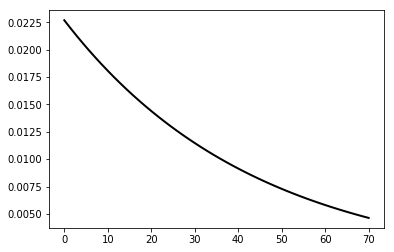

In [35]:
x = np.linspace(0, 70)
rv = stats.lomax(c=res_lomax.x[0], scale=res_lomax.x[1])

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')